# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
# number of callbacks for white-sounding names
sum(data[data.race=='w'].call)

235.0

In [5]:
# Block used for intial inspection
# data.head()
data.columns.values
# len(data)
# type(data)

array(['id', 'ad', 'education', 'ofjobs', 'yearsexp', 'honors',
       'volunteer', 'military', 'empholes', 'occupspecific', 'occupbroad',
       'workinschool', 'email', 'computerskills', 'specialskills',
       'firstname', 'sex', 'race', 'h', 'l', 'call', 'city', 'kind',
       'adid', 'fracblack', 'fracwhite', 'lmedhhinc', 'fracdropout',
       'fraccolp', 'linc', 'col', 'expminreq', 'schoolreq', 'eoe',
       'parent_sales', 'parent_emp', 'branch_sales', 'branch_emp', 'fed',
       'fracblack_empzip', 'fracwhite_empzip', 'lmedhhinc_empzip',
       'fracdropout_empzip', 'fraccolp_empzip', 'linc_empzip', 'manager',
       'supervisor', 'secretary', 'offsupport', 'salesrep', 'retailsales',
       'req', 'expreq', 'comreq', 'educreq', 'compreq', 'orgreq', 'manuf',
       'transcom', 'bankreal', 'trade', 'busservice', 'othservice',
       'missind', 'ownership'], dtype=object)

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
</div>

# Question 1: 
We will use a two sample bootstrap hypothesis test, since we are comparing the means of two different data sets.  The CLT applies as both data sets are large (2435 entries each) and we assume that the jobs do not "fill" that is to say, person A getting a call has no impact on person B getting a call. 
</div>

# Question 2:
The null hypothesis is that mean number of calls within a two sample bootstrap should be similar. That is to say, that there is no racial discrimination. The alternative hypothesis is that the means are significantly different, showcasing some sort of discrimination. 


In [6]:
w = data[data.race=='w']
b = data[data.race=='b']
print(len(w))
print(len(b))
print(len(data))

2435
2435
4870


# Question 3: 
Determine margin of error and confidence interval

Here we use a two sample bootstrap method to test the null hypothesis. We learn that the p value is very small, so we reject it in favor of the alternative hypothesis.

p-value = 0.0
Since the p value is below 0.05 we reject the null hypothesis


Values outside of the range:  [ 0.0550308   0.07474332]  are considered abnormal for black candidates
Values outside of the range:  [ 0.08542094  0.10841889]  are considered abnormal for white candidates


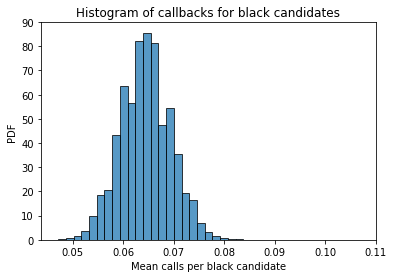

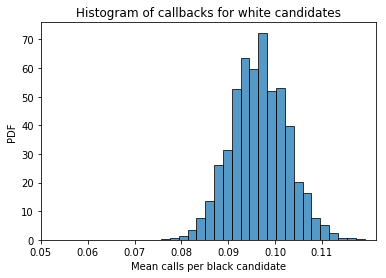

The two sample z score is:  2.9224096095371053
The z test result is:  0.00347334421949
As this value is far below 0.05 we reject the null hypothesis and accept the alternative hypothesis


Mean callbacks per black candidate:  0.0644763857126236
Mean callbacks per white candidate:  0.09650924056768417


Std of callbacks per black candidate:  0.24559901654720306
Std of callbacks per white candidate:  0.29528486728668213


In [8]:
# Your solution to Q3 here

# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 1)
# Author: Justin Bois
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Implement the bootstrapping functions from the Datacamp Course: Statistical Thinking in Python (Part 2)
# Author: Justin Bois
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates
##
# End of section from Justin Bois's Datacamp course
##

# Test if black and white candidates receive a similar number of phone calls back from employers.
# Null hypothesis: white and black candidates have similar calls per .

# Separate df into black calls and white calls
wCalls = w['call']
bCalls = b['call']

# These values show the average number of calls each candidate receives. 
wCall_mean = sum(w.call)/len(w)
bCall_mean = sum(b.call)/len(b)

# Caluculate the difference in means
call_mean_diff = wCall_mean - bCall_mean


# Concatenate calls: call_concat
call_concat = np.concatenate((wCalls, bCalls))

# Initialize bootstrap replicates: bs_replicates
bs_replicates = np.empty(10000)

for i in range(10000):
    # Generate bootstrap sample
    bs_sample = np.random.choice(call_concat, size=len(call_concat))
    
    # Compute replicate
    bs_replicates[i] = np.mean(bs_sample[:len(wCalls)]) - np.mean(
                                     bs_sample[len(bCalls):])

# Compute and print p-value: p
p = np.sum(bs_replicates >= call_mean_diff) / len(bs_replicates)
print('p-value =', p)
print('Since the p value is below 0.05 we reject the null hypothesis')
print('\n')

# Calculate confidence interval 
# Calculate and plot standard error of the mean
bs_b_call_reps = draw_bs_reps(bCalls, np.mean, 10000)
bs_w_call_reps = draw_bs_reps(wCalls, np.mean, 10000)

# Compute the 95% confidence interval: conf_int
b_conf_int = np.percentile(bs_b_call_reps, [2.5, 97.5])
w_conf_int = np.percentile(bs_w_call_reps, [2.5, 97.5])

# Print the confidence interval
print('Values outside of the range: ', b_conf_int, ' are considered abnormal for black candidates')
print('Values outside of the range: ', w_conf_int, ' are considered abnormal for white candidates')



# Compute standard error of the mean 
# Calculate and plot standard error of the mean for black candidates
bsTemp_b_reps = draw_bs_reps(bCalls, np.mean, 10000)
b_sem = np.std(bCalls) / np.sqrt(len(bCalls))
bsTemp_b_std = np.std(bsTemp_b_reps)
# print(bsTemp_b_std)

plt.title('Histogram of callbacks for black candidates')
plt.hist(bsTemp_b_reps, bins = 25, normed = True, alpha=0.75, histtype='bar', ec='black')
plt.xlabel('Mean calls per black candidate')
plt.xticks(np.arange(0.050, 0.12, step=0.01))
plt.ylabel('PDF')
plt.show()
plt.clf()


# Calculate and plot standard error of the mean for white candidates
bsTemp_w_reps = draw_bs_reps(wCalls, np.mean, 10000)
w_sem = np.std(wCalls) / np.sqrt(len(wCalls))
bsTemp_w_std = np.std(bsTemp_w_reps)
# print(bsTemp_w_std)

plt.title('Histogram of callbacks for white candidates')
plt.hist(bsTemp_w_reps, bins = 25, normed = True, alpha=0.75, histtype='bar', ec='black')
plt.xticks(np.arange(0.050, 0.12, step=0.01))
plt.xlabel('Mean calls per black candidate')
plt.ylabel('PDF')
plt.show()
plt.clf()



# Plot CDFs
# Compute mean and standard deviation: mu, sigma
mu_b = np.mean(bCalls)
sigma_b = np.std(bCalls)
n_b = len(bCalls)

mu_w = np.mean(wCalls)
sigma_w = np.std(wCalls)
n_w = len(wCalls)

# Compute the two sample z test (delta = 0)
z = (mu_w - mu_b - 0) / ( (((sigma_b**2)/n_b)**0.5) + (((sigma_w**2)/n_w)**0.5) )   
print('The two sample z score is: ', z)

from scipy import stats
# Multiply by two for the two tailed test
z_result = stats.norm.sf(abs(z))*2

print('The z test result is: ', z_result)
print('As this value is far below 0.05 we reject the null hypothesis and accept the alternative hypothesis')

print('\n')
print('Mean callbacks per black candidate: ', mu_b)
print('Mean callbacks per white candidate: ', mu_w)
print('\n')
print('Std of callbacks per black candidate: ', sigma_b)
print('Std of callbacks per white candidate: ', sigma_w)


<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
</div>
# Question 4: 
As the two sample z score is 2.922, leading to a test statistic of 0.0035 we reject the null hypothesis that the mean callbacks per candidates of different races. This means the the alternative hypothesis holds within the data set. 

The implication of our results is that employers tend to, whether intentional or not, discriminate against invidivuals whose names would be considered a part of black culture. This is an important social issue that I will leave to the politicians and activist to tackle. Here I will focus on the data set. One key piece of information is that the standard deviation of callbacks for the black candidates was smaller than that of the white candidates. This may be indicative of bias against black candidates making up a portion of callback decision, as opposed to entirely relying on credentials. 


# Question 5:
Since the entires were identical aside from the name and race, we do not need to delve into two sample bootstrap experiments for every variable in the resumes to determine if one category is more impactful for black or white individuals. However, this does not mean that race is necessarily the most important factor to callback success. In order to determine the most important factors we could do one of the following: 

1.) Conduct a principal component analysis to find which combination of variables constituted the majority of the variance.

2.) Determine the difference in mean callbacks between subsections of the data with different values for: rank, computerskills, yearsexp, etc. and find the difference of means between the different subcollections. The variable that yield the greatest difference of means between it's different groups is the most important variable for callback success. 